In [4]:
# %load https://gist.githubusercontent.com/kidpixo/2ec078d09834b5aa7869/raw/c8812811211dc7cd62f5b530b51b0104f39263ff/ipython%20inizialization
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
all_commits = ! cat MERTIS_Configuration_git_single_table_all_commits.txt

commits = ['filenames']

for i in all_commits:
    state,value = i.split(' ')
    if state[0] == 'C':
        print 'SVN commit n. ',value
        commits.append(value)

all_filenames = pd.read_csv('MERTIS_Configuration_git_single_table_all_filenames.txt',names=commits,header=None)
# reindex the data
all_filenames.set_index('filenames',inplace=True)
# delete index name
all_filenames.index.names = [None]

SVN commit n.  243
SVN commit n.  289
SVN commit n.  362
SVN commit n.  508
SVN commit n.  525
SVN commit n.  596
SVN commit n.  654
SVN commit n.  773
SVN commit n.  1168
SVN commit n.  1366
SVN commit n.  1440
SVN commit n.  1654
SVN commit n.  1828
SVN commit n.  1987
SVN commit n.  1998
SVN commit n.  2096
SVN commit n.  2158
SVN commit n.  2280


### Legend

git status

- `A` : file added
- `D` : file deleted
- `M` : file modified

array values for each commit:

- 0 : file des not exist or deleted
- 1 : file exist
- 2 : file exists and modified
- 3 : file added

[Git - git-log Documentation](http://git-scm.com/docs/git-log)

--diff-filter=[(A|C|D|M|R|T|U|X|B)…[*]]

Select only files that are Added (A), Copied (C), Deleted (D), Modified (M), Renamed (R), have their type (i.e. regular file, symlink, submodule, …) changed (T), are Unmerged (U), are Unknown (X), or have had their pairing Broken (B). Any combination of the filter characters (including none) can be used. When * (All-or-none) is added to the combination, all paths are selected if there is any file that matches other criteria in the comparison; if there is no file that matches other criteria, nothing is selected.



In [6]:
def_states = {
    'A' : 0,
    'M' : 32,
    'S' : 64, # custom value, Static
    'D' : 128,
    'N' : 128, # custom value, Non existent
}

# fill NaN
all_filenames.fillna(def_states['N'], inplace=True)

actual_commit = 0
# previous_commit = 0
for i in all_commits:
    state,value = i.split(' ')
    # set the commit number
    if state[0] == 'C':
        # starting at the second commit see which file exist in the previous commit
        if actual_commit != int(all_filenames.columns[0]):
            previous_commit = actual_commit
        actual_commit = value
#         print actual_commit,previous_commit,actual_commit != 0 and actual_commit != int(all_filenames.columns[0])
        # assig 1 to file not null un the previous commit
        if previous_commit != 0:
            all_filenames[actual_commit][all_filenames[previous_commit] != def_states['N']] = def_states['S']
    else:
        all_filenames.ix[value,actual_commit] = def_states[state[0]]

In [7]:
all_filenames

,243,289,362,508,525,596,654,773,1168,1366,1440,1654,1828,1987,1998,2096,2158,2280
CommandSequence_Definition.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
CommandSequence_Elements.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
CommandSequence_Parameters.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
CompConfig_Table.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Component_Templates.sql,0,64,64,64,64,64,64,64,64,64,64,32,32,32,32,64,64,64
Component_Versions.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Components_List.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
CompoundItemMode_Table.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
ConfigInfo_TableQM1.sql,128,0,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
ConfigInfo_Table_DM_Main.sql,0,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [8]:
history = all_filenames.values.copy()

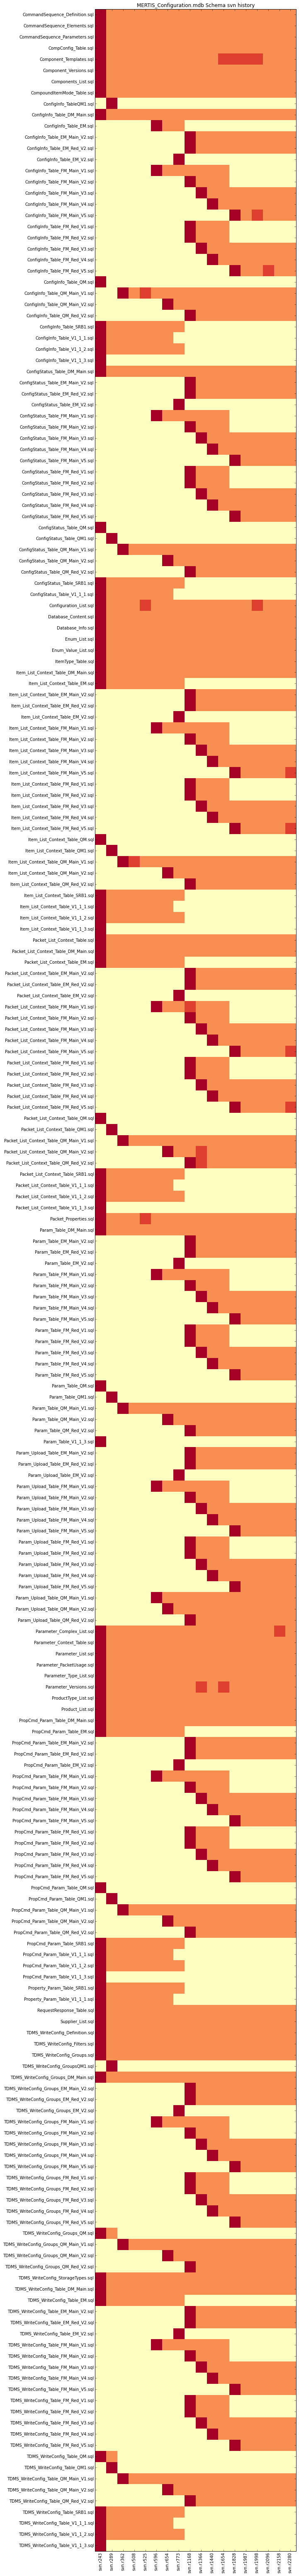

In [9]:
fig = plt.figure(figsize=[25,110])
plt.title('MERTIS_Configuration.mdb Schema svn history')
plt.imshow(history,interpolation='nearest',cmap = plt.cm.RdYlBu,vmin = 0, vmax = 255 )
plt.xticks(range(history.shape[1]), 'svn.r'+all_filenames.columns, rotation='vertical');
plt.yticks(range(history.shape[0]), all_filenames.index.tolist());

In [10]:
fig.savefig('history.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('history.png', bbox_inches='tight', pad_inches=0)